# German Credit Data

### Import the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/teresazhang/Documents/NTU/Y3S1/BC3409/Assignment/Elearning/german_credit(1).csv")

In [3]:
df.shape

(1000, 21)

### Check for null values

In [4]:
df.isnull().any()

Creditability                        False
Account Balance                      False
Duration of Credit Mths              False
Payment Status of Previous Credit    False
Purpose                              False
Credit Amount                        False
Value of Savings and Stocks          False
Length of current employment         False
Instalment per cent                  False
Sex and Marital Status               False
Guarantors                           False
Duration in Current address          False
Most valuable available asset        False
Age                                  False
Concurrent Credits                   False
Type of apartment                    False
No of Credits at this Bank           False
Occupation                           False
No of dependents                     False
Telephone                            False
Foreign Worker                       False
dtype: bool

In [5]:
X = df.drop(columns = "Creditability")
Y = df["Creditability"]

In [6]:
df.describe()

,Creditability,Account Balance,Duration of Credit Mths,Payment Status of Previous Credit,Purpose,Credit Amount,Value of Savings and Stocks,Length of current employment,Instalment per cent,Sex and Marital Status,...,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


### Data Visualisation

<AxesSubplot:>

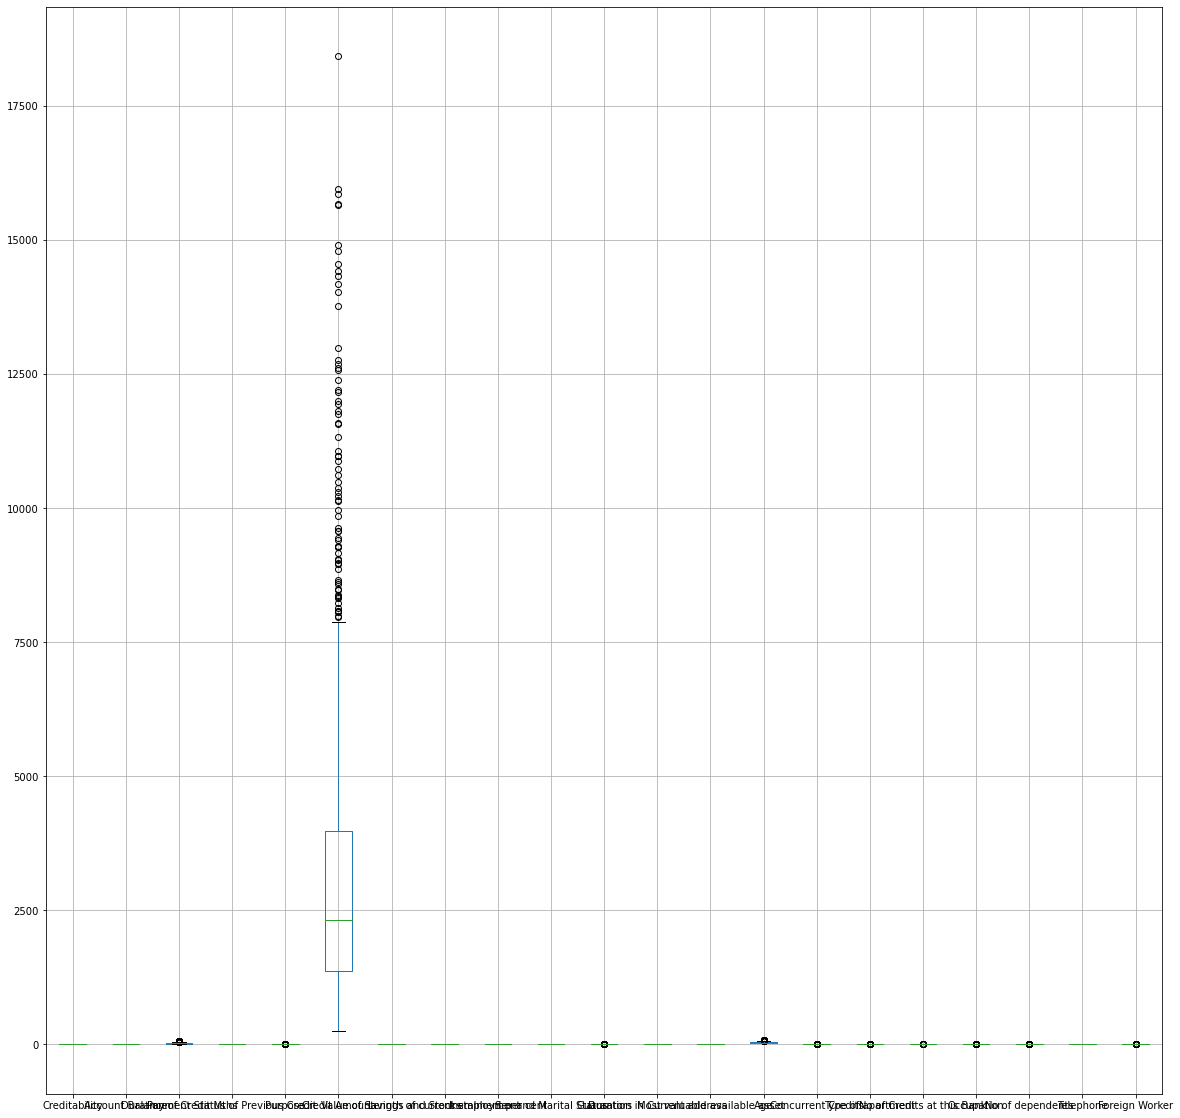

In [7]:
df.boxplot(figsize=(20,20))

array([[<AxesSubplot:title={'center':'Creditability'}>,
        <AxesSubplot:title={'center':'Account Balance'}>,
        <AxesSubplot:title={'center':'Duration of Credit Mths'}>,
        <AxesSubplot:title={'center':'Payment Status of Previous Credit'}>,
        <AxesSubplot:title={'center':'Purpose'}>],
       [<AxesSubplot:title={'center':'Credit Amount'}>,
        <AxesSubplot:title={'center':'Value of Savings and Stocks'}>,
        <AxesSubplot:title={'center':'Length of current employment'}>,
        <AxesSubplot:title={'center':'Instalment per cent'}>,
        <AxesSubplot:title={'center':'Sex and Marital Status'}>],
       [<AxesSubplot:title={'center':'Guarantors'}>,
        <AxesSubplot:title={'center':'Duration in Current address'}>,
        <AxesSubplot:title={'center':'Most valuable available asset'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Concurrent Credits'}>],
       [<AxesSubplot:title={'center':'Type of apartment'}>,
     

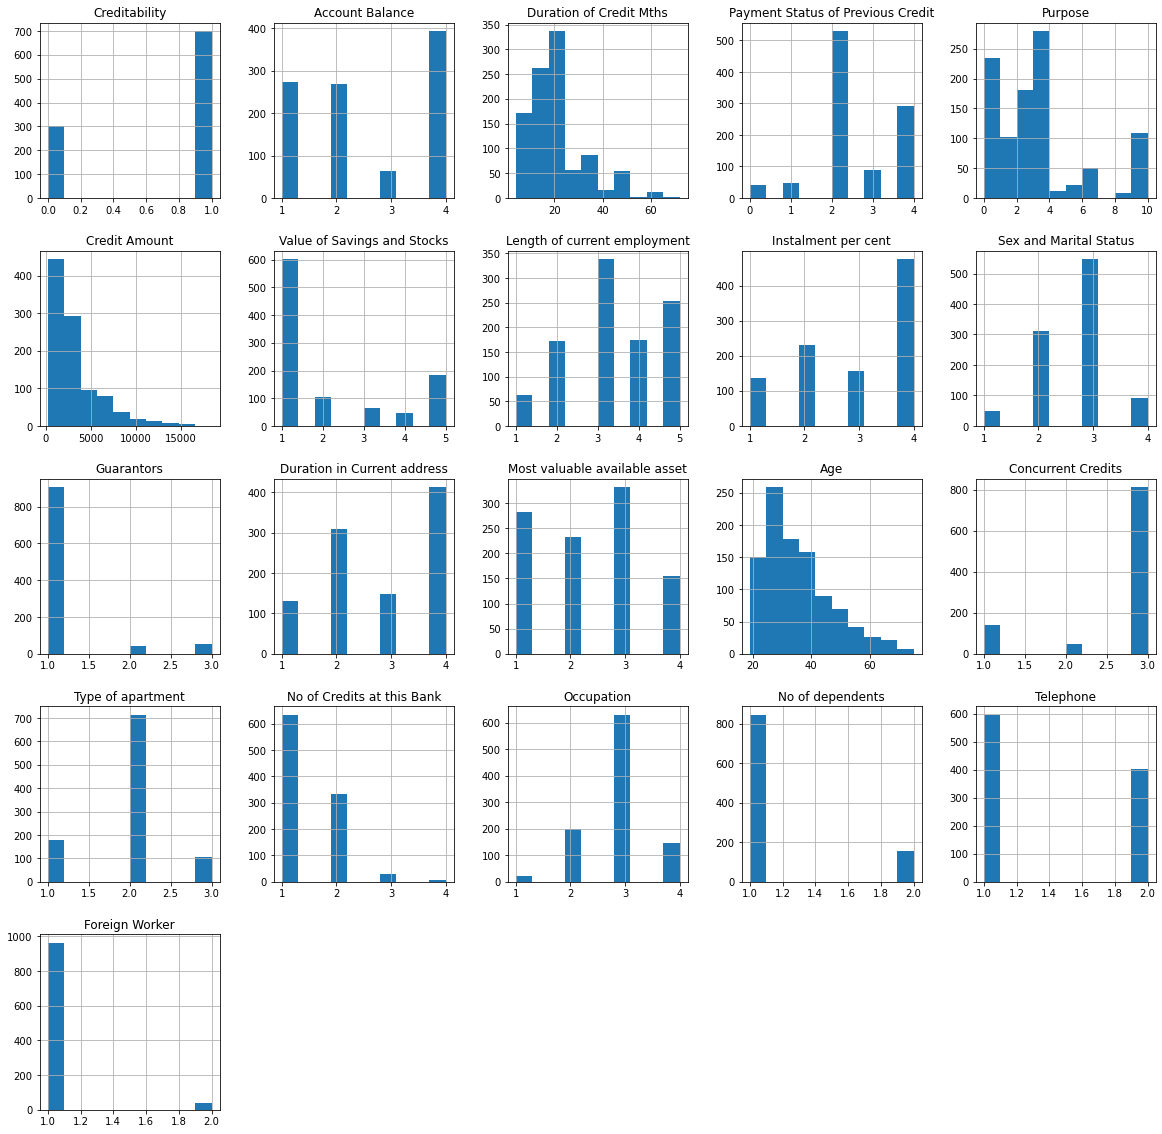

In [8]:
df.hist(figsize=(20,20))

<AxesSubplot:>

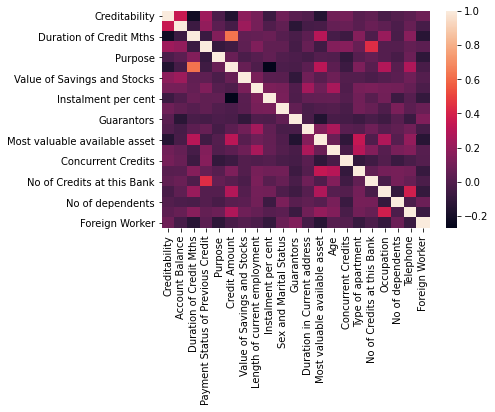

In [9]:
import seaborn as sns
sns.heatmap(df.corr())

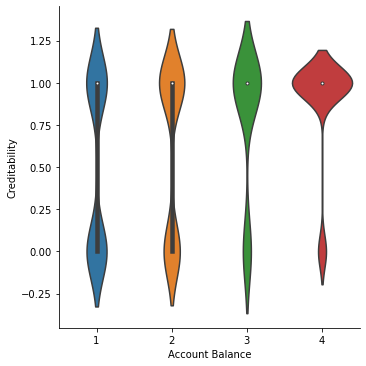

In [10]:
sns.catplot(data=df,x="Account Balance",y="Creditability",kind="violin")

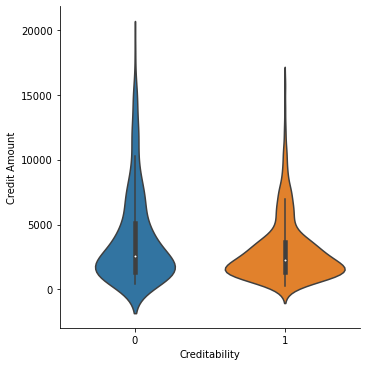

In [11]:
sns.catplot(data=df,x="Creditability",y="Credit Amount", kind="violin")

In [12]:
import matplotlib.pyplot as plt

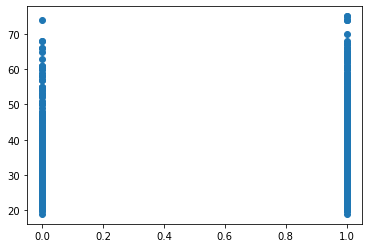

In [13]:
plt.scatter(df["Creditability"], df["Age"])

### Feature Selection

In [14]:
from sklearn.feature_selection import f_regression,SelectKBest

In [15]:
f = SelectKBest(score_func=f_regression,k=10)

In [16]:
f = f.fit(X,Y).get_support()

In [17]:
X.columns[f]

Index(['Account Balance', 'Duration of Credit Mths',
       'Payment Status of Previous Credit', 'Credit Amount',
       'Value of Savings and Stocks', 'Length of current employment',
       'Sex and Marital Status', 'Most valuable available asset', 'Age',
       'Concurrent Credits'],
      dtype='object')

In [18]:
df = df.loc[:, ['Creditability', 'Account Balance', 'Duration of Credit Mths',
       'Payment Status of Previous Credit', 'Credit Amount',
       'Value of Savings and Stocks', 'Length of current employment',
       'Sex and Marital Status', 'Most valuable available asset', 'Age',
       'Concurrent Credits']]

### Train test split

In [19]:
df["Creditability"].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [20]:
X = df.drop(columns="Creditability")
Y = df["Creditability"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

In [23]:
Y_train.value_counts()

1    524
0    226
Name: Creditability, dtype: int64

### Normalize

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
X_train,Y_train = SMOTE(random_state=1).fit_resample(X_train,Y_train)

In [26]:
from scipy import stats

In [27]:
X_train["Credit Amount"] = stats.zscore(X_train["Credit Amount"])

In [28]:
X_test["Credit Amount"] = stats.zscore(X_test["Credit Amount"])

## Machine Learning

### Logistic Regression

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
from sklearn import linear_model

In [31]:
model = linear_model.LogisticRegression(random_state=1)

In [32]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Accuracy is", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

Accuracy is 0.716


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


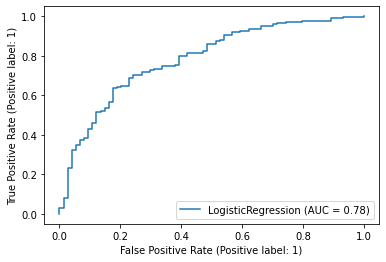

In [34]:
plot_roc_curve(model, X_test, Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


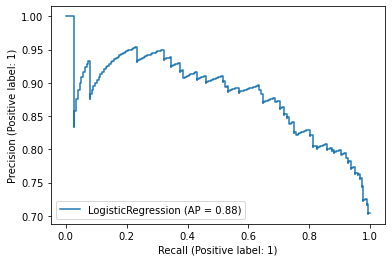

In [35]:
plot_precision_recall_curve(model, X_test, Y_test)

### Decision Tree

In [36]:
from sklearn import tree

In [37]:
model = tree.DecisionTreeClassifier(random_state=1)

In [38]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Accuracy is", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

Accuracy is 0.656


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


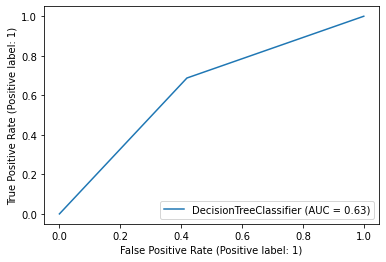

In [39]:
plot_roc_curve(model, X_test, Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


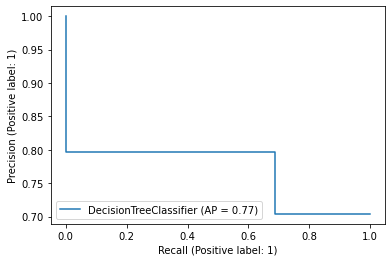

In [40]:
plot_precision_recall_curve(model, X_test, Y_test)

### Random Forest

In [41]:
from sklearn import ensemble

In [42]:
model = ensemble.RandomForestClassifier(random_state=1)

In [43]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Accuracy is", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

Accuracy is 0.736


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


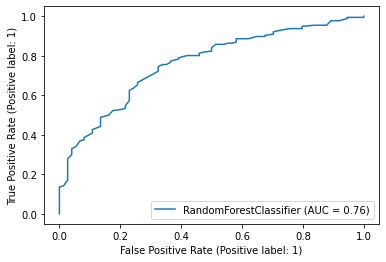

In [44]:
plot_roc_curve(model, X_test, Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


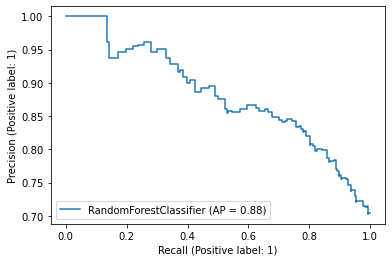

In [45]:
plot_precision_recall_curve(model, X_test, Y_test)

### Gradient Boosting

In [46]:
model = ensemble.GradientBoostingClassifier(random_state=1)

In [47]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Accuracy is", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

Accuracy is 0.708


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


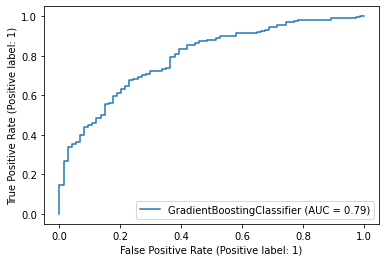

In [48]:
plot_roc_curve(model, X_test, Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


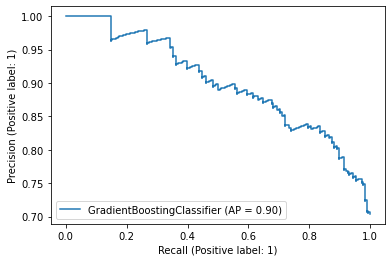

In [49]:
plot_precision_recall_curve(model, X_test, Y_test)

### Neural Network

In [50]:
from sklearn import neural_network

In [51]:
model = neural_network.MLPClassifier(random_state=1)

In [52]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Accuracy is", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

Accuracy is 0.768


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


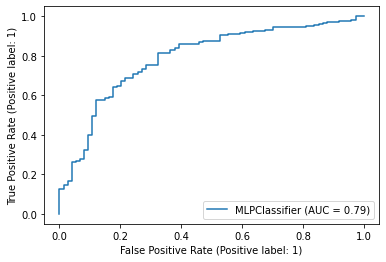

In [53]:
plot_roc_curve(model, X_test, Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


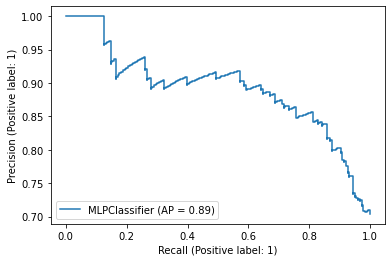

In [54]:
plot_precision_recall_curve(model, X_test, Y_test)

### Clustering

In [55]:
from sklearn.cluster import KMeans

In [56]:
model = KMeans(n_clusters=2)

In [57]:
model.fit(X)

KMeans(n_clusters=2)

In [58]:
pred = model.predict(X)

In [60]:
cm = confusion_matrix(Y,pred)
print("Accuracy is: ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy :  0.329


In [63]:
from yellowbrick.cluster import KElbowVisualizer

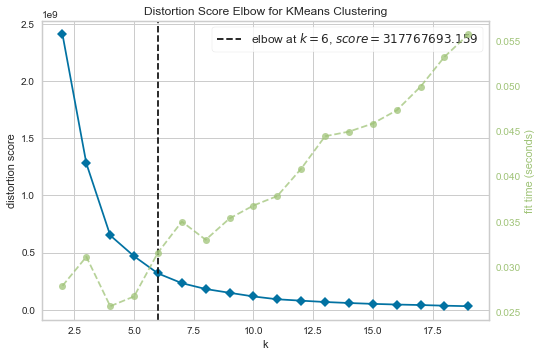

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
v = KElbowVisualizer(model,k=(2,20))
v.fit(X)
v.show()

K-means clustering tries to group similar kinds of items in form of clusters. It finds the similarity between the items and groups them into the clusters. 

Elbow method is an empirical method to find out the best value of k (number of groups). It picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.

Looking at the graph, at k=2, the distortion score is still very high, thus resulting in a higher error for clustering. The score decrease drastically at k=6, thus, that is the optimial value.